# Step1- Data analysis: Expected delivery End of Day Monday- 05/29/2023. Price $60 dollars
## **Instruction**
1. The relevant libraries to import, and the function/purpose each library is used for.
2. How to read data and deﬁne target and independent variables.
3. Plotting dependent and independent variables to observe the trends,
4. Data transformation: which include lags/leads (of up to six quarters), log form, Year-over-year
percentage change (for relevant variables).
4. For all variables from Step-4: Performing correlation analysis and plotting correlation
heatmap/correlation matrix.

# Importing Libraries

In [17]:
import pandas as pd
import plotly.express as px
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_training = pd.read_excel('Datasets/Modeling Data-V02.xlsx',sheet_name='Training-Data')
df_testing =  pd.read_excel('Datasets/Modeling Data-V02.xlsx',sheet_name='Testing-Data')

In [3]:
df_training['DRS-Target Variable'] = df_training['DRS-Target Variable'] /100

In [6]:
df_training.head(5)

,Scenario Name,Date,DRS-Target Variable,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
0,Actual,2005 Q1,0.0142,4.5,7.9,-4.8,-2.5,5.3,2.0,2.5,3.9,4.4,5.2,5.8,5.4,11637.3,171.9,180.6,14.7
1,Actual,2005 Q2,0.0155,2.0,5.0,3.9,6.6,5.1,2.7,2.9,3.9,4.2,5.4,5.7,5.9,11856.7,178.8,186.3,17.7
2,Actual,2005 Q3,0.0159,3.2,7.0,1.7,6.1,5.0,6.2,3.4,4.0,4.3,5.4,5.8,6.4,12282.9,185.0,192.7,14.2
3,Actual,2005 Q4,0.0164,2.3,5.6,3.4,6.7,5.0,3.8,3.8,4.4,4.6,5.8,6.2,7.0,12497.2,190.2,199.9,16.5
4,Actual,2006 Q1,0.0160,5.5,8.5,8.3,10.6,4.7,2.1,4.4,4.6,4.7,5.8,6.2,7.4,13121.6,193.1,205.6,14.6


In [7]:
df_testing.head(5)

,Scenario Name,Date,DRS-Target Variable,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
0,Actual,2020 Q1,2.35,-5.1,-3.9,3.0,4.3,3.8,1.0,1.1,1.2,1.4,3.4,3.5,4.4,25984.8,217.1,300.1,82.7
1,Actual,2020 Q2,2.54,-31.2,-32.4,48.5,46.1,13.0,-3.1,0.1,0.4,0.7,3.4,3.2,3.3,31576.8,219.6,301.5,57.1
2,Actual,2020 Q3,2.84,33.8,38.7,-16.6,-13.6,8.8,4.7,0.1,0.3,0.6,2.4,3.0,3.3,34305.8,225.2,300.0,33.6
3,Actual,2020 Q4,2.74,4.5,6.6,-8.3,-6.9,6.8,2.4,0.1,0.4,0.9,2.3,2.8,3.3,39219.6,232.7,311.7,40.3
4,Actual,2021 Q1,2.67,6.3,10.9,54.7,60.6,6.2,3.7,0.1,0.6,1.4,2.4,2.9,3.3,41602.7,242.2,312.9,37.2


In [8]:
print('Shape of Training Data (rows,columns) : ',df_training.shape)
print('Shape of Testing Data (rows,columns) : ',df_testing.shape)

Shape of Training Data (rows,columns) :  (60, 19)
Shape of Testing Data (rows,columns) :  (8, 19)


# Data
## Features information
The dataset represents various economic indicators over a period of time. Here is an explanation of the columns:

1. **Scenario Name**: Indicates whether the data is actual or from a particular scenario.
2. **Date**: Represents the quarter and year for which the economic indicators are recorded.
3. **Real GDP growth**: The percentage change in the Gross Domestic Product adjusted for inflation.
4. **Nominal GDP growth**: The percentage change in the Gross Domestic Product without adjusting for inflation.
5. **Real disposable income growth**: The percentage change in disposable income adjusted for inflation.
6. **Nominal disposable income growth**: The percentage change in disposable income without adjusting for inflation.
7. **Unemployment rate**: The percentage of the labor force that is unemployed.
8. **CPI inflation rate**: The Consumer Price Index inflation rate, which measures changes in the average prices of goods and services.
9. **3-month Treasury rate**: The interest rate on 3-month Treasury bills.
10. **5-year Treasury yield**: The yield on 5-year Treasury bonds.
11. **10-year Treasury yield**: The yield on 10-year Treasury bonds.
12. **BBB corporate yield**: The yield on corporate bonds with a BBB rating.
13. **Mortgage rate**: The interest rate on mortgage loans.
14. **Prime rate**: The prime interest rate, which is the rate at which banks lend to their most creditworthy customers.
15. **Dow Jones Total Stock Market Index (Level)**: The level of the Dow Jones Total Stock Market Index, representing the  performance of the stock market.
16. **House Price Index (Level)**: The level of the House Price Index, which measures changes in residential property prices.
17. **Commercial Real Estate Price Index (Level)**: The level of the Commercial Real Estate Price Index, which measures changes in commercial property prices.
18. **Market Volatility Index (Level)**: The level of the Market Volatility Index, indicating the market's expectation of future volatility.
19. **DRS-Target Variable**: An identifier or code associated with the data.
The dataset provides information on various economic variables, allowing analysis and examination of trends, relationships, and the impact of different factors on the economy.







# Dicussion and Conclusion
**From the plots, we can observe the trends and patterns of each independent variable over time. Here are some insights that can be derived from the plots**

    1. Variable Trends: We can visually analyze the trends and fluctuations in each independent variable. This includes identifying any increasing or decreasing patterns, seasonality, or irregular movements.

    2. Correlation: By examining the plots together, we can assess the correlation between the independent variables. If two variables show similar patterns or move in the same direction over time, it suggests a positive correlation. Conversely, if two variables exhibit opposite trends, it indicates a negative correlation.

    3. Outliers: Outliers, if present, can be identified as data points that deviate significantly from the overall trend. These outliers may require further investigation and consideration when analyzing the relationship between variables.

    4. Comparison with Dependent Variable: The plots also allow us to compare the trends in the independent variables with the dependent variable (DRSFRMACBS). This helps in understanding how the independent variables may be related to the dependent variable and whether any visible patterns or relationships exist.
# Conclusion
    1. Based on the plots, the conclusion or insights drawn will depend on the specific patterns and relationships observed. It may vary from case to case. For example, if there are consistent positive trends or strong correlations between certain independent variables and the dependent variable, it suggests that those independent variables might have a significant impact on the dependent variable. On the other hand, if there are no clear trends or relationships, it may indicate a weak or non-existent relationship between the variables. Further analysis, such as statistical modeling or hypothesis testing, may be required to draw more definitive conclusions.





In [10]:
df_training.columns

Index(['Scenario Name', 'Date', 'DRS-Target Variable', 'Real GDP growth',
       'Nominal GDP growth', 'Real disposable income growth',
       'Nominal disposable income growth', 'Unemployment rate',
       'CPI inflation rate', '3-month Treasury rate', '5-year Treasury yield',
       '10-year Treasury yield', 'BBB corporate yield', 'Mortgage rate',
       'Prime rate', 'Dow Jones Total Stock Market Index (Level)',
       'House Price Index (Level)',
       'Commercial Real Estate Price Index (Level)',
       'Market Volatility Index (Level)'],
      dtype='object')

In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

predictors = [
    'Real GDP growth',
    'Nominal GDP growth',
    'Real disposable income growth',
    'Nominal disposable income growth',
    'Unemployment rate',
    'CPI inflation rate',
    '3-month Treasury rate',
    '5-year Treasury yield',
    '10-year Treasury yield',
    'BBB corporate yield',
    'Mortgage rate',
    'Prime rate',
    'Dow Jones Total Stock Market Index (Level)',
    'House Price Index (Level)',
    'Commercial Real Estate Price Index (Level)',
    'Market Volatility Index (Level)',
    'DRS-Target Variable'
    ]


# Count the number of independent features
num_features = len(predictors)

# Set the number of columns and rows for subplots
num_cols = 2
num_rows = (num_features - 1) // num_cols + 1

# Create the subplots layout with titles
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=predictors)

# Loop through the independent features and add traces to subplots
for i, feature_name in enumerate(predictors):
    # Calculate the row and column indices for the current subplot
    row = i // num_cols + 1
    col = i % num_cols + 1
    
    # Select the data for the current feature from the DataFrame
    x_data = df_training['Date']
    y_data = df_training[feature_name]
    
    # Create a scatter trace for the current feature and add it to the subplot
    scatter_trace = go.Scatter(x=x_data, y=y_data, name=feature_name)
    fig.add_trace(scatter_trace, row=row, col=col)

# Update the layout of the figure
fig.update_layout(height=1800, width=1500, title_text="Stacked Subplots")

# Display the figure
fig.show()


In [10]:
df_training.columns

Index(['Scenario Name', 'Date', 'DRS-Target Variable', 'Real GDP growth',
       'Nominal GDP growth', 'Real disposable income growth',
       'Nominal disposable income growth', 'Unemployment rate',
       'CPI inflation rate', '3-month Treasury rate', '5-year Treasury yield',
       '10-year Treasury yield', 'BBB corporate yield', 'Mortgage rate',
       'Prime rate', 'Dow Jones Total Stock Market Index (Level)',
       'House Price Index (Level)',
       'Commercial Real Estate Price Index (Level)',
       'Market Volatility Index (Level)'],
      dtype='object')

In [14]:


# Step 2: Perform data transformation - Log Transformation
log_transform_variables = ['Dow Jones Total Stock Market Index (Level)',
                            'House Price Index (Level)',
                            'Commercial Real Estate Price Index (Level)']

for var in log_transform_variables:
    df_training[f'log_{var}'] = np.log(df_training[var])

# Step 3: Perform data transformation - Year-over-Year Change
yoy_change_variables = ['Dow Jones Total Stock Market Index (Level)',
                        'House Price Index (Level)',
                        'Commercial Real Estate Price Index (Level)']

for var in yoy_change_variables:
    df_training[f'{var}_YOY'] = df_training[var].pct_change(4) * 100  # Assuming quarterly data, calculate year-over-year percentage change

# Step 4: Perform data transformation - Lags/Leads
lags = range(1, 7)  # Lags of up to six quarters
lag_lead_variables = ['Unemployment rate', '10-year Treasury yield','Mortgage rate']

for var in lag_lead_variables:
    for lag in lags:
        df_training[f'{var}_lag_{lag}'] = df_training[var].shift(lag)


In [46]:
list(df_testing)

['Scenario Name',
 'Date',
 'DRS-Target Variable',
 'Real GDP growth',
 'Nominal GDP growth',
 'Real disposable income growth',
 'Nominal disposable income growth',
 'Unemployment rate',
 'CPI inflation rate',
 '3-month Treasury rate',
 '5-year Treasury yield',
 '10-year Treasury yield',
 'BBB corporate yield',
 'Mortgage rate',
 'Prime rate',
 'Dow Jones Total Stock Market Index (Level)',
 'House Price Index (Level)',
 'Commercial Real Estate Price Index (Level)',
 'Market Volatility Index (Level)']

The correlation heatmap provides visual information about the correlation between the selected columns in your DataFrame. Here's how you can interpret the information from the plot:

* The heatmap consists of a grid of squares, where each square represents the correlation between two variables. The color of each square represents the strength and direction of the correlation.

    * Darker shades (e.g., dark blue) indicate a strong negative correlation, meaning that as one variable increases, the other variable tends to decrease.
    * Lighter shades (e.g., light blue) indicate a weak negative correlation.
    * Lighter shades of a different color (e.g., light red) indicate a weak positive correlation, where the variables tend to increase or decrease together.
    * Darker shades of a different color (e.g., dark red) indicate a strong positive correlation, meaning that as one variable increases, the other variable tends to increase as well.
* The numbers within each square represent the correlation coefficient, which quantifies the strength and direction of the correlation. The coefficient ranges from -1 to 1.

    *  A correlation coefficient of -1 indicates a perfect negative correlation.
    * A correlation coefficient of 0 indicates no correlation.
    * A correlation coefficient of 1 indicates a perfect positive correlation.
    * The diagonal line of squares represents the correlation of each variable with itself, which is always 1.

By examining the heatmap, you can identify patterns of correlation between the selected variables. Strong correlations, whether positive or negative, are indicated by the darker shades. Weak or no correlations are indicated by the lighter shades or values closer to 0.

This information can help you understand the relationships between variables in your dataset and identify potential multicollinearity or dependencies among the variables.

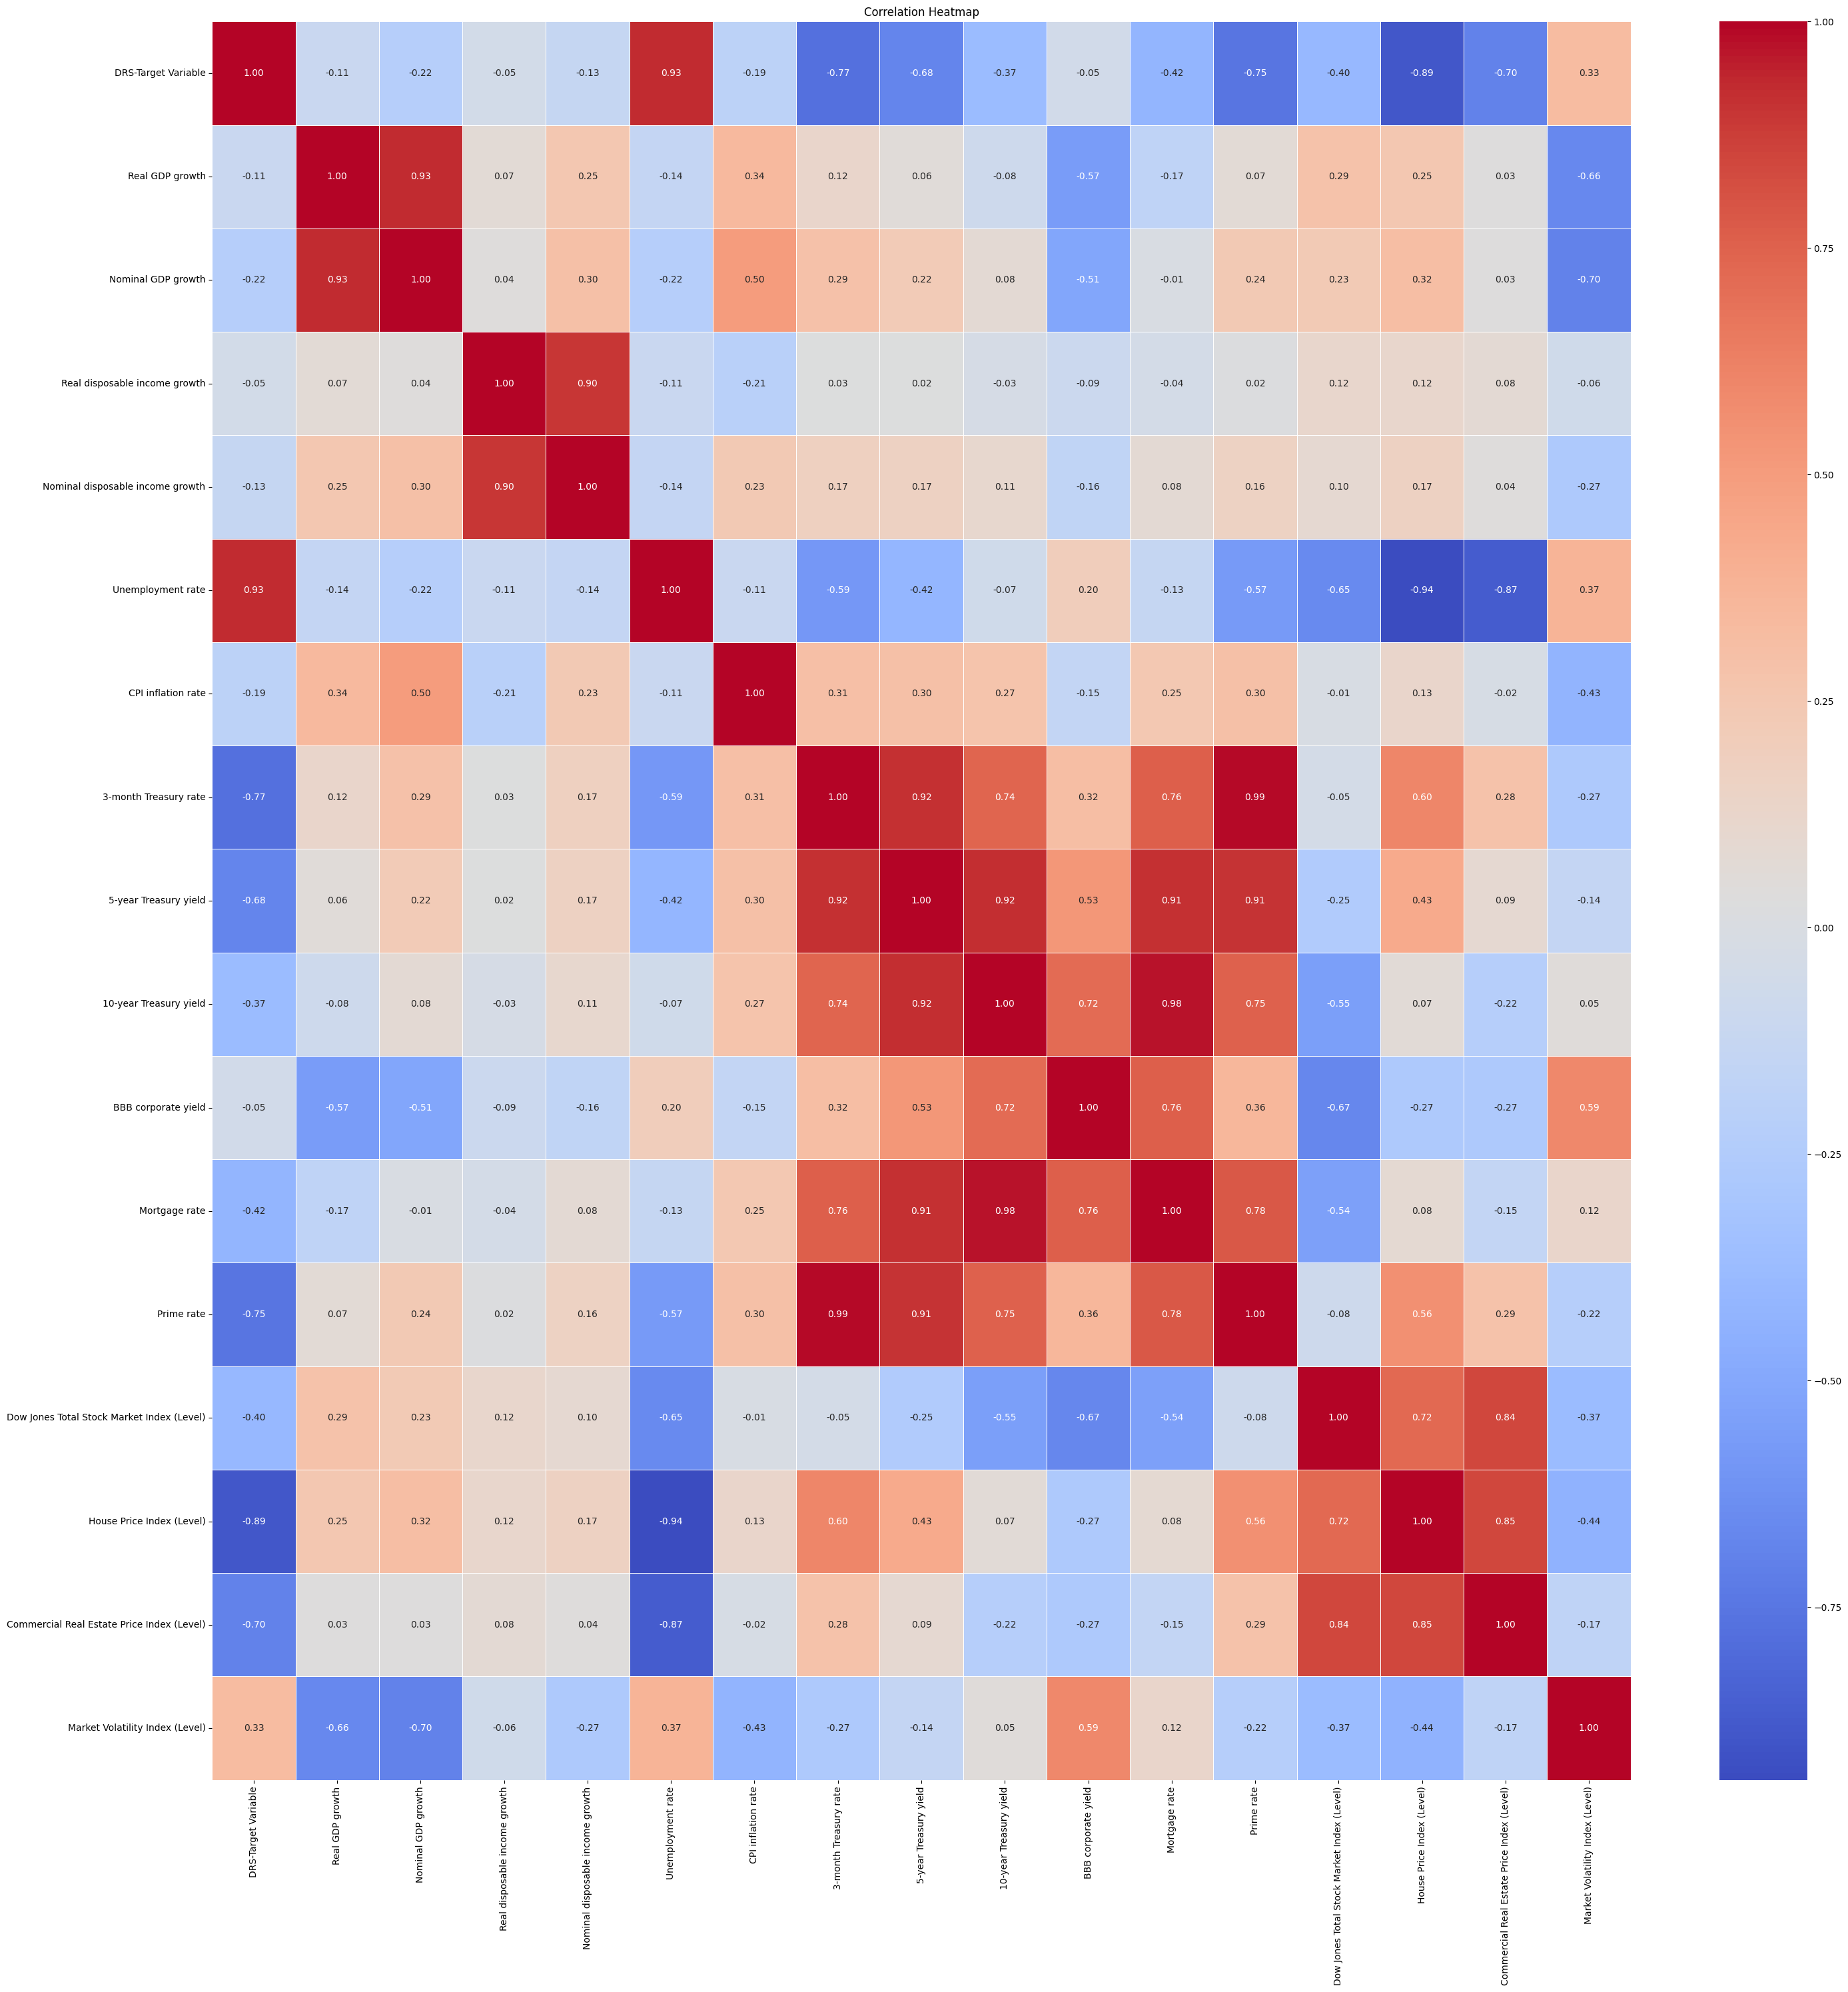

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Define the specific columns for correlation analysis
columns_of_interest =[
                    'DRS-Target Variable',
                    'Real GDP growth',
                    'Nominal GDP growth',
                    'Real disposable income growth',
                    'Nominal disposable income growth',
                    'Unemployment rate',
                    'CPI inflation rate',
                    '3-month Treasury rate',
                    '5-year Treasury yield',
                    '10-year Treasury yield',
                    'BBB corporate yield',
                    'Mortgage rate',
                    'Prime rate',
                    'Dow Jones Total Stock Market Index (Level)',
                    'House Price Index (Level)',
                    'Commercial Real Estate Price Index (Level)',
                    'Market Volatility Index (Level)'
                    ]

# Step 3: Subset the DataFrame to include only the columns of interest
numeric_df = df_training[columns_of_interest]

# Step 4: Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 5: Plot the correlation heatmap using seaborn
plt.figure(figsize=(30, 30))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [22]:
list(df_training)

['Scenario Name',
 'Date',
 'DRS-Target Variable',
 'Real GDP growth',
 'Nominal GDP growth',
 'Real disposable income growth',
 'Nominal disposable income growth',
 'Unemployment rate',
 'CPI inflation rate',
 '3-month Treasury rate',
 '5-year Treasury yield',
 '10-year Treasury yield',
 'BBB corporate yield',
 'Mortgage rate',
 'Prime rate',
 'Dow Jones Total Stock Market Index (Level)',
 'House Price Index (Level)',
 'Commercial Real Estate Price Index (Level)',
 'Market Volatility Index (Level)',
 'log_Dow Jones Total Stock Market Index (Level)',
 'log_House Price Index (Level)',
 'log_Commercial Real Estate Price Index (Level)',
 'Dow Jones Total Stock Market Index (Level)_YOY',
 'House Price Index (Level)_YOY',
 'Commercial Real Estate Price Index (Level)_YOY',
 'Unemployment rate_lag_1',
 'Unemployment rate_lag_2',
 'Unemployment rate_lag_3',
 'Unemployment rate_lag_4',
 'Unemployment rate_lag_5',
 'Unemployment rate_lag_6',
 '10-year Treasury yield_lag_1',
 '10-year Treasury yi

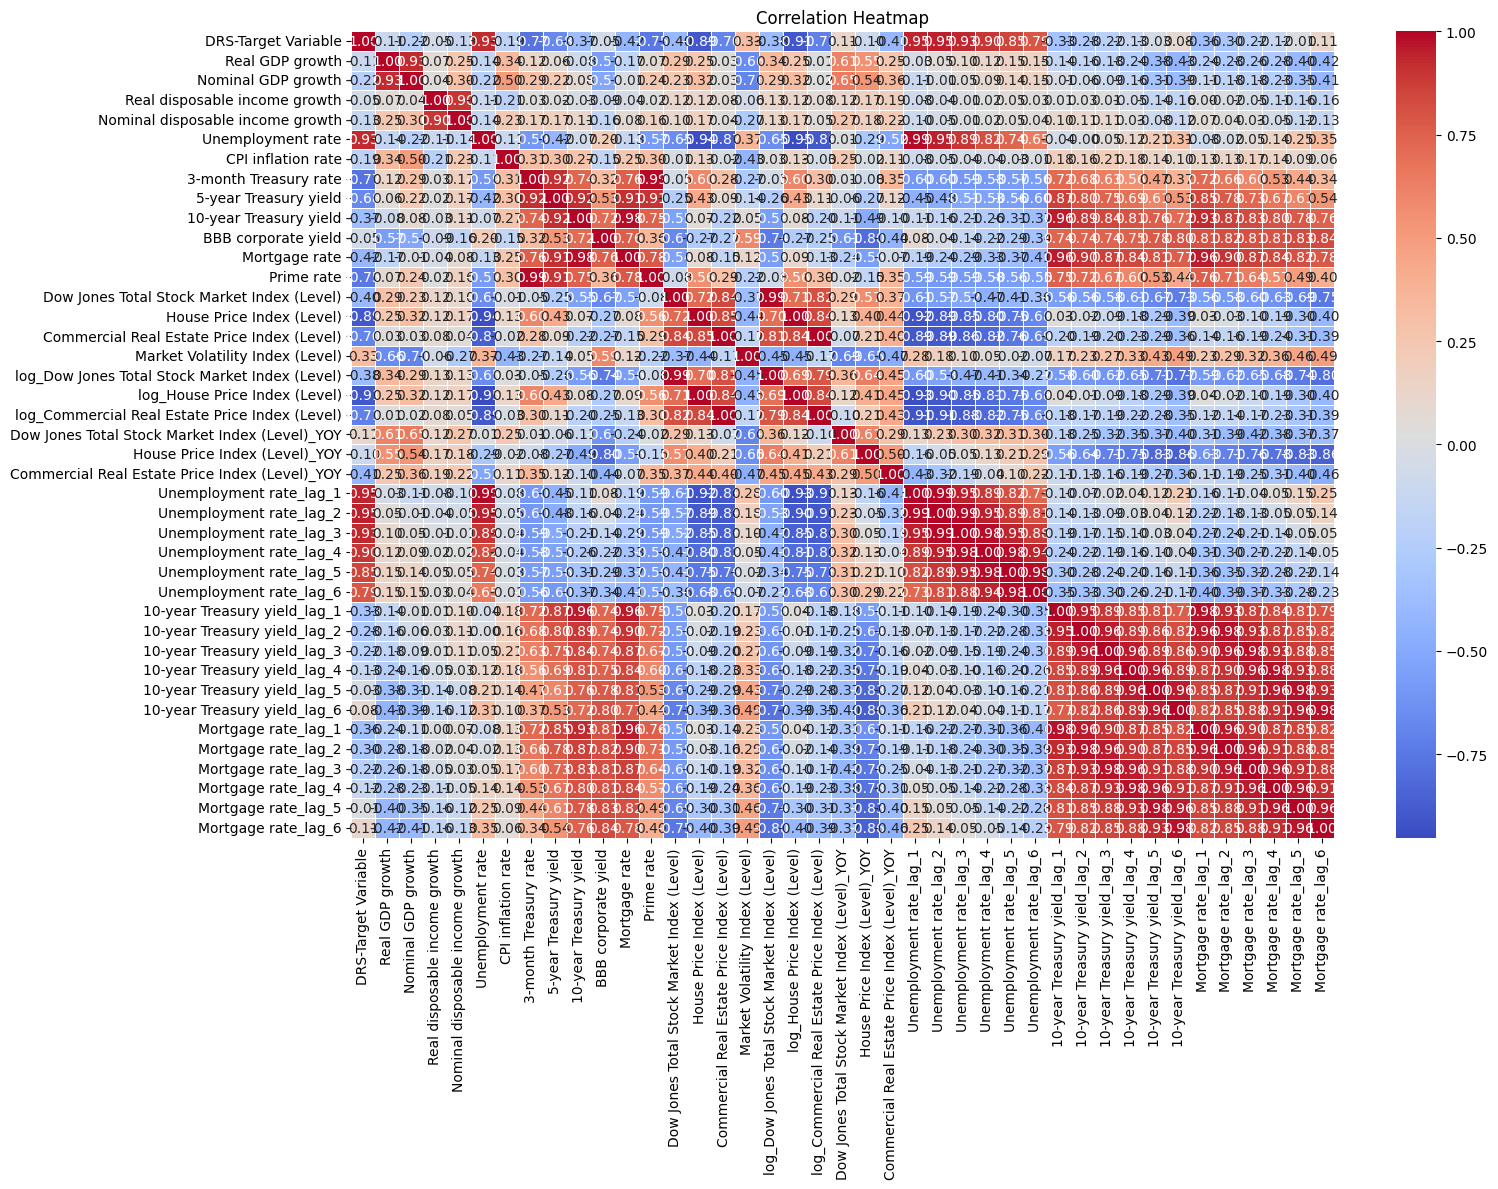

In [19]:
import pandas as pd
import plotly.express as px
import seaborn as sns
# Step 2: Exclude text-type columns from correlation analysis
numeric_columns = df_training.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df_training[numeric_columns]

# Step 3: Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 4: Plot the correlation heatmap using seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


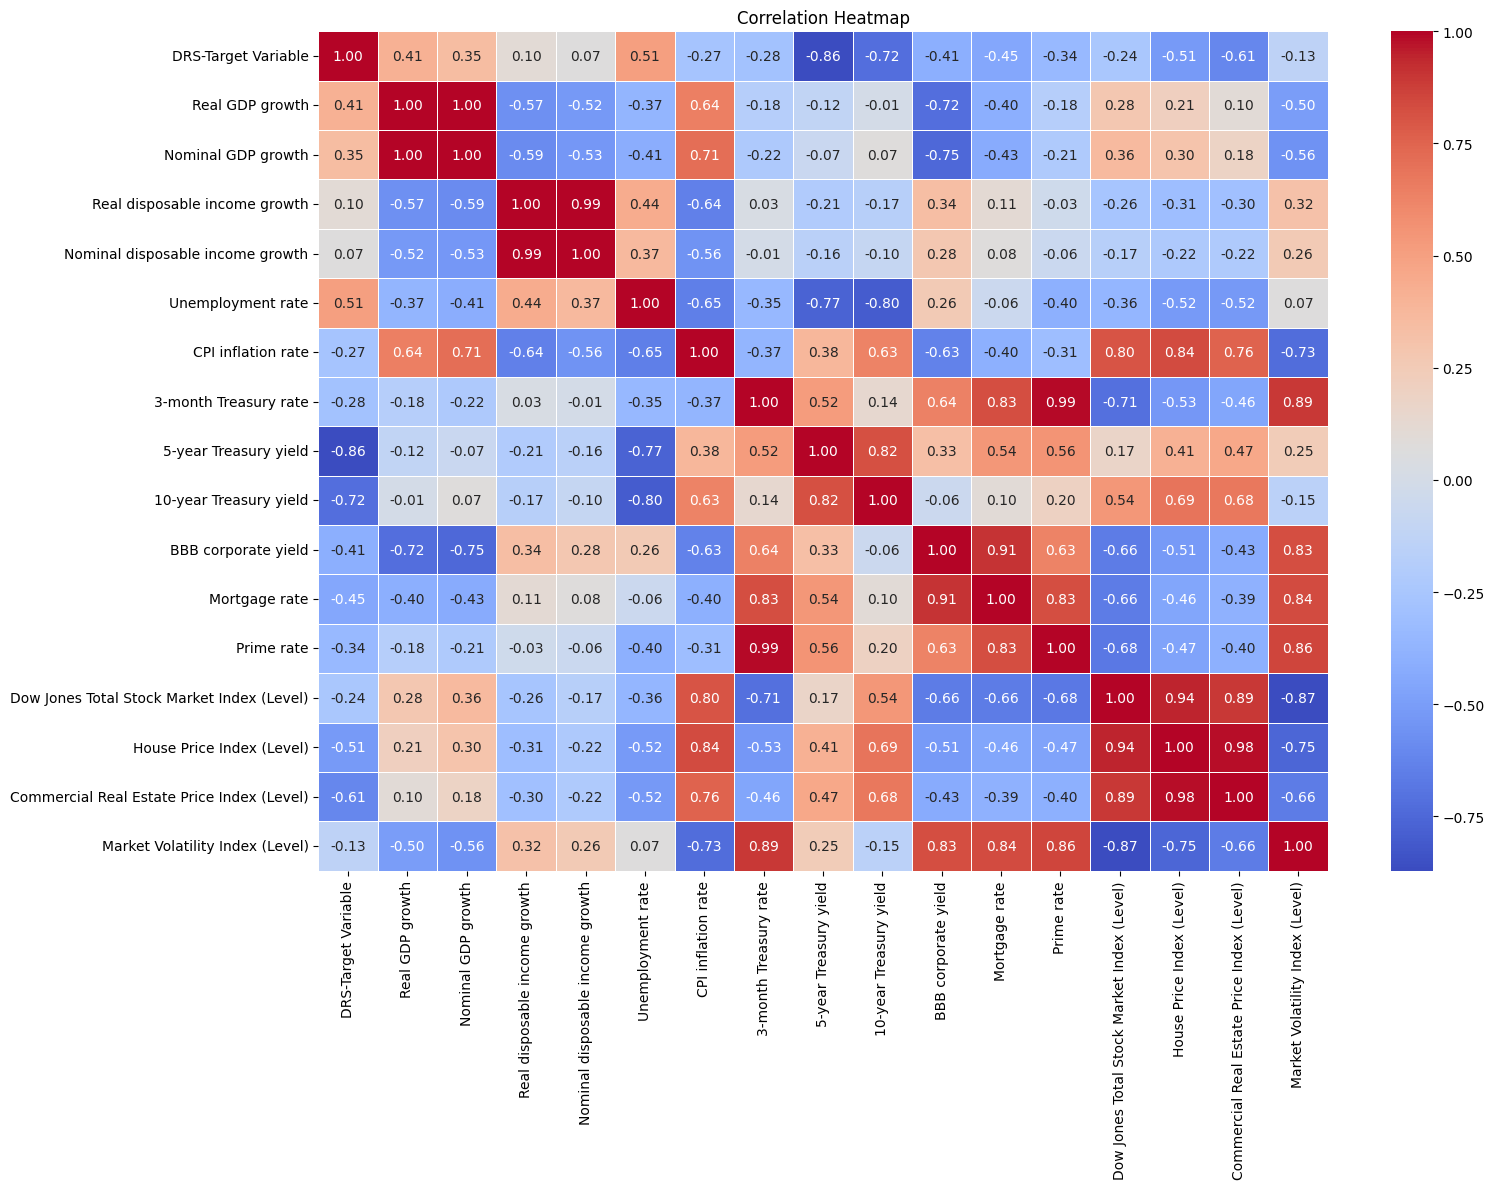

In [47]:

# Step 2: Exclude text-type columns from correlation analysis
numeric_columns = df_testing.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df_testing[numeric_columns]

# Step 3: Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 4: Plot the correlation heatmap using seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [52]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# Step 1: Load the dataset
df = df_training

# Step 2: Exclude text-type columns from correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Step 3: Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 4: Create the correlation heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    colorbar=dict(title="Correlation")
))

# Add text annotations with correlation values
annotations = []
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        annotations.append(
            dict(
                x=correlation_matrix.columns[j],
                y=correlation_matrix.columns[i],
                text=f"{value:.2f}",
                showarrow=False,
                font=dict(color='black' if abs(value) < 0.5 else 'white')  # Adjust font color based on correlation strength
            )
        )

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    width=1000,
    height=1000,
    margin=dict(l=200, r=200, t=100, b=100),  # Adjust margins for spacing
    annotations=annotations
)

# Display the plot
pio.show(fig)


# Step-2


In [56]:
list(df_testing)

['Scenario Name',
 'Date',
 'DRS-Target Variable',
 'Real GDP growth',
 'Nominal GDP growth',
 'Real disposable income growth',
 'Nominal disposable income growth',
 'Unemployment rate',
 'CPI inflation rate',
 '3-month Treasury rate',
 '5-year Treasury yield',
 '10-year Treasury yield',
 'BBB corporate yield',
 'Mortgage rate',
 'Prime rate',
 'Dow Jones Total Stock Market Index (Level)',
 'House Price Index (Level)',
 'Commercial Real Estate Price Index (Level)',
 'Market Volatility Index (Level)']

In [60]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


predictors = df_testing[[
                        'Real GDP growth',
                        'Nominal GDP growth',
                        'Real disposable income growth',
                        'Nominal disposable income growth',
                        'Unemployment rate',
                        'CPI inflation rate',
                        '3-month Treasury rate',
                        '5-year Treasury yield',
                        '10-year Treasury yield',
                        'BBB corporate yield',
                        'Mortgage rate',
                        'Prime rate',
                        'Dow Jones Total Stock Market Index (Level)',
                        'House Price Index (Level)',
                        'Commercial Real Estate Price Index (Level)',
                        'Market Volatility Index (Level)'
                        ]]
target_variable = df_testing['DRS-Target Variable']
gauss_log = sm.GLM(target_variable, predictors, family=sm.families.Gaussian(sm.families.links.Log()))
gauss_log_results = gauss_log.fit()
print(gauss_log_results.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     DRS-Target Variable   No. Observations:                    8
Model:                             GLM   Df Residuals:                        0
Model Family:                 Gaussian   Df Model:                            7
Link Function:                     Log   Scale:                             inf
Method:                           IRLS   Log-Likelihood:                   -inf
Date:                 Sun, 28 May 2023   Deviance:                   4.5489e-05
Time:                         17:30:36   Pearson chi2:                 4.55e-05
No. Iterations:                      1   Pseudo R-squ. (CS):                nan
Covariance Type:             nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

/home/iffi/anaconda3/envs/sep_darts_2/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning:

divide by zero encountered in scalar divide

/home/iffi/anaconda3/envs/sep_darts_2/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1806: RuntimeWarning:

invalid value encountered in scalar subtract

